<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/unibo-intensive-program-2024/blob/main/1-notebooks/chapter-05-02.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Advanced Clustering Techniques

## Gaussian Mixture Models and Expectation-Maximization

### What you will Learn in this Chapter

Upon completing this lesson, students will be able to:

1. **Understand Gaussian Mixture Models (GMMs):**
   - Describe what Gaussian Mixture Models are and how they differ from other clustering algorithms like K-Means.
   - Explain the concept of mixture modeling and how GMMs utilize probability distributions to perform soft clustering.
2. **Apply GMMs to Synthetic Data:**
   - Generate synthetic datasets with specified characteristics using scikit-learn's `make_blobs` or similar functions.
   - Understand the importance of parameters such as the number of components and covariance type in GMMs and how they affect the model's behavior and performance.
3. **Fit a GMM Using scikit-learn:**
   - Use the `GaussianMixture` class from scikit-learn's `mixture` module to fit a GMM to data.
   - Interpret the key attributes of a fitted GMM, including the means, covariances, and weights of the components.

4. **Visualize Clustering Results:**
   - Create meaningful visualizations to compare the original data distribution and the clustering results obtained from GMM.
   - Use Matplotlib for plotting data points, cluster centroids, and confidence ellipses to represent the covariances of the components.

5. **Evaluate Model Performance:**
   - Calculate and interpret metrics such as the log-likelihood of the model to assess its fit to the data.
   - Understand the role of model selection criteria, like the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC), in choosing the optimal number of components for a GMM.

By achieving these objectives, students will gain a comprehensive understanding of Gaussian Mixture Models and be equipped with practical skills to apply GMMs effectively in data science projects using Python.

### Introduction

- Gaussian Mixture Models (GMMs) are a type of unsupervised learning model that assumes all the data points are generated from a mixture of several Gaussian distributions with unknown parameters, each representing one cluster or component. 

- These Gaussian distributions are blended together to form the complete dataset. 

- GMMs are used for clustering similar to k-means but provide more flexibility due to the incorporation of distributional information. 

- GMMs can accommodate clusters that have different sizes and correlations as well as different shapes, unlike k-means which assumes all clusters are spherical.

<center>
    
<img src="./pics/ch-05-02-00.jpg" width="500" height="500">
</center>

Here, we can see that there are three Gaussian functions, hence K = 3. Each Gaussian explains the data contained in each of the three clusters available. The mixing coefficients are themselves probabilities and must meet this condition:

$$\sum\limits_{k=1}^K \pi_k = 1$$

- All the instances generated from a single Gaussian distribution
form a cluster that typically looks like an ellipsoid. 

- Each cluster can have a different
ellipsoidal shape, size, density and orientation

<center>
    
<img src="./pics/ch-05-02-01.jpg" width="500" height="500">
</center>

**How GMMs Work**

1. **Mixture of Gaussians**: A GMM models the data as a finite mixture of Gaussian distributions. Each Gaussian, also known as a component of the mixture, has its own mean (center) and covariance (shape, orientation, and size). The mixture model allows for the representation of an overall distribution that can capture more complexity than a single Gaussian distribution.

2. **Expectation-Maximization (EM) Algorithm**: To estimate the parameters (means, covariances, and mixture weights) of the Gaussian components, GMMs typically use the Expectation-Maximization (EM) algorithm. The EM algorithm iteratively performs two steps until convergence:
   - **Expectation Step (E-step)**: Given the current parameters, compute the probability that each data point belongs to each Gaussian component. This step essentially assigns weights to each data point based on how likely they are to belong to each component.
   - **Maximization Step (M-step)**: Update the parameters of the Gaussians to maximize the likelihood of the data given these new assignments.

**Soft Clustering**

Unlike k-means which assigns each data point to exactly one cluster, GMMs allow for soft clustering. This means each data point is assigned a probability (or weight) reflecting how likely it is to belong to each cluster. This probabilistic approach enables the model to express uncertainty about the assignments, especially when data points are equidistant to cluster centers or when clusters overlap.

**Advantages of GMMs**

- **Flexibility in Cluster Shapes**: GMMs can capture elongated or elliptical clusters due to the model's ability to fit Gaussians with different covariances.
- **Handling Overlapping Clusters**: GMM can effectively handle situations where clusters overlap. Unlike algorithms like K-Means, which assume non-overlapping clusters, GMM can represent the uncertainty when points are near the boundary between clusters.
- **Soft Clustering**: The probabilistic cluster assignments can be more informative, especially in cases where data points could plausibly belong to multiple clusters.
- **Density Estimation**: Beyond clustering, GMMs provide a way to estimate the density distribution of the data, which can be useful for anomaly detection or generating new data points that are similar to the input data.
- **Robustness to Outliers**: GMM is less sensitive to outliers compared to some other clustering methods like K-Means. Outliers are less likely to dominate the cluster assignment.

**Use Cases**

- **Clustering**: Identifying natural groupings in data when clusters may have different sizes, shapes, and densities.
- **Anomaly Detection**: Spotting outliers by evaluating how well they fit into the learned mixture of Gaussians.
- **Image Segmentation**: Grouping pixels in images into coherent regions or objects based on color or texture.

**Considerations**

- **Initialization Sensitivity**: The results of GMMs can be sensitive to the initialization of parameters. Multiple runs with different initializations may be necessary to find a good solution.
- **Computational Complexity**: The EM algorithm can be computationally intensive, especially as the number of components and dimensions of the data increase.
- **Model Selection**: Determining the optimal number of Gaussian components in the mixture is a non-trivial problem and often requires criteria like [Bayesian Information Criterion (BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion) or [Akaike Information Criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) for model selection.

### The Shape Problem of K-Means

The K-Means Clustering algorithm places a circular boundary around the center of each cluster. This approach works well when the data has a roughly circular shape, however, this approach may be ineffective when the data has a different shape, such as an oblong or elliptical shape. Let's see a very simple example: 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [25]:
np.random.seed(42)

In [58]:
def generate_elliptic(n_samples=500):
    X = np.concatenate((
    np.random.normal([0, 3], [0.3, 1], (n_samples, 2)),
    np.random.normal([2, 4], [0.4, .9], (n_samples, 2)),
    np.random.normal([4, 6], [0.5, .8], (n_samples, 2))
    ))
    return X

This Python function, `generate_elliptic`, is designed to generate a dataset of points distributed in an elliptical shape in a 2-dimensional space. The function uses NumPy to create and manipulate the dataset. Here's a breakdown of its components and functionality:

- **Function Definition**: The function is defined with the name `generate_elliptic` and has a default parameter `n_samples=500`, which specifies the number of samples to generate for each group of points.

- **Generating Points**:
  - The function generates points for three groups, each with a different mean and standard deviation for their distribution, using the `np.random.normal` function.
  - For each group, the `np.random.normal` function is called with different parameters:
    - The first parameter specifies the mean of the distribution for each dimension. For instance, `[0, 3]` for the first group, `[2, 4]` for the second, and `[4, 6]` for the third. This determines where the center of each group of points will be located in the 2-dimensional space.
    - The second parameter specifies the standard deviation for each dimension, controlling the spread of the points around the mean. The values `[0.3, 1]` indicate a tighter distribution in the first dimension and a wider spread in the second dimension for the first two groups. The third group has a slightly wider spread in the first dimension with `[0.4, 1]`.
    - The third parameter `(n_samples, 2)` specifies the shape of the output, indicating that each group will have `n_samples` points, each with two dimensions (x and y coordinates).

- **Concatenation of Points**:
  - The `np.concatenate` function is used to merge the three groups of points into a single dataset. The function is passed a tuple containing the three sets of points generated by `np.random.normal`, combining them along their first axis (vertically), resulting in a dataset with `3 * n_samples` points and 2 dimensions.

- **Return Value**:
  - The function returns the concatenated dataset `X`, which contains the combined points from all three groups.

In summary, `generate_elliptic` creates a dataset of 2D points distributed around three different means, with each group having its own spread characteristics.

In [59]:
# first choice
X = generate_elliptic()

In [89]:
# second choice
import sklearn
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Now let's try to apply a simple k-means to this dataset.

In [90]:
'''
K-means Class Initialization

- KMeans(n_clusters=3, random_state=42) initializes an instance of the KMeans class.
- n_clusters=3 specifies the number of clusters to form as well as the number of centroids to generate. 
  In this case, the dataset will be divided into three clusters.
- random_state=42 sets a seed to the random number generator ensuring, as usual, reproducibility of the results. 
  By fixing the random state, the initial centroids' selection is consistent across different runs of the algorithm.
'''
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
'''
Fitting the Model and Predicting Labels

- fit_predict(X) performs two operations: it fits the K-means model on the dataset X and returns the cluster 
  labels for each data point. The dataset X is expected to be a two-dimensional array of shape (n_samples, n_features) 
  where n_samples is the number of data points and n_features is the number of features. Each data point is assigned 
  a label corresponding to the cluster it belongs to, ranging from 0 to n_clusters - 1.
'''
kmeans_labels = kmeans.fit_predict(X)
'''
Accessing Cluster Centers

- kmeans.cluster_centers_ is an attribute of the fitted KMeans instance that stores the coordinates of the cluster centers. 
  After the algorithm has converged, this attribute contains the centroid of each cluster. The centroids are returned 
  as a two-dimensional array of shape (n_clusters, n_features), where each row corresponds to a cluster center, 
  and each column represents a dimension in the feature space.
'''
kmeans_cluster_centers = kmeans.cluster_centers_

The following code, calculates the radii of clusters formed by the K-means clustering algorithm. It does so by determining the maximum distance from the centroid of each cluster to any point within that cluster. This measure can be useful for understanding the spread or size of each cluster in the dataset. 

In [91]:
# the radius of each cluster
kmeans_cluster_radii = [np.max(np.linalg.norm(X[kmeans_labels == i, :] - kmeans.cluster_centers_[i, :], axis=1))
         for i in range(3)]

Since this could be a little criptic for python beginners, let's break down the code for clarity:

- **Outer Loop**: The list comprehension iterates over each cluster `i` in the range of `0` to `2`, inclusive, since `range(3)` generates numbers `0`, `1`, and `2`, corresponding to the three clusters specified in the `KMeans` initialization.

- **Conditional Indexing**: `X[kmeans_labels == i, :]` selects all points in the dataset `X` that are labeled as belonging to the `i`th cluster. This is achieved by comparing `kmeans_labels`, the array of cluster labels for each point in `X`, with the cluster index `i`. The comparison yields a boolean array, which is used to index `X` and select the relevant points.

- **Centroid Subtraction**: `- kmeans.cluster_centers_[i, :]` computes the vector difference between each selected point and the centroid of their cluster. The operation is vectorized, meaning it is applied element-wise to each point in the subset of `X` belonging to cluster `i`.

- **Norm Calculation**: `np.linalg.norm(..., axis=1)` calculates the Euclidean distance (norm) from each point to the centroid of its cluster. The `axis=1` parameter specifies that the norm should be computed across columns, resulting in the distance for each point.

- **Maximum Distance**: `np.max(...)` finds the maximum value in the array of distances for each cluster, which represents the radius of the cluster. This radius is the distance from the centroid to the farthest point in the cluster.

The result of this code snippet is a list, `kmeans_cluster_radii`, containing the radius of each of the three clusters identified by the K-means algorithm. Each element of the list corresponds to the maximum distance from the centroid to any point in the respective cluster, providing a measure of the cluster's size or spread.

Now let's see the final result using plotlib. The following produce a visualization that includes two subplots: one displaying the raw data points and the other showing the clustered data with centroids and the computed radii.

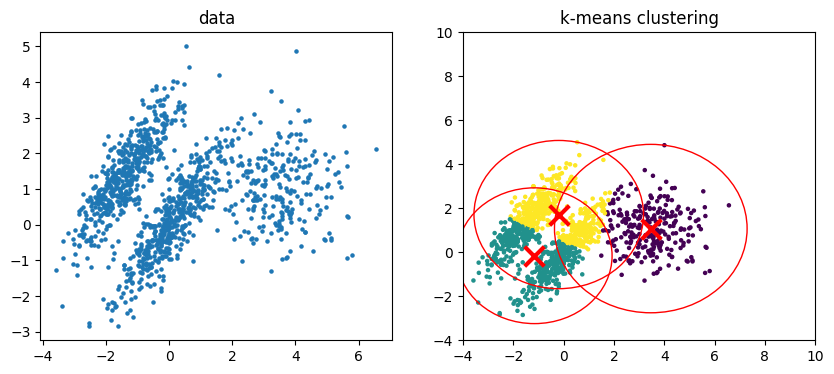

In [92]:
import seaborn as sns
'''
Preparation

This line initializes a figure and two subplots (axes) side by side (since ncols=2). 
The figsize=(10, 4) parameter defines the size of the figure.
'''
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
'''
Plotting Raw Data

- The first subplot visualizes the raw data points. ax[0].scatter(X[:, 0], X[:, 1]) creates a scatter plot using 
  the first and second columns of the dataset X as x and y coordinates, respectively.
- ax[0].set_title("data") sets the title of the first subplot to "data".
'''
ax[0].scatter(X[:, 0], X[:, 1], s=5)
ax[0].set_title("data")
'''
Plotting K-means Clustering Results

- The second subplot also creates a scatter plot of the dataset X, but this time the color of the points 
  (c=kmeans_labels) is determined by the cluster labels assigned by the K-means algorithm, visually 
  distinguishing the clusters.
'''
ax[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=5)
'''
This line adds the cluster centers to the second subplot, represented by red 'x' markers. The size (s=200), 
linewidth (linewidth=3), and color (color='r') of the markers are specified to make them prominent.
'''
ax[1].scatter(kmeans_cluster_centers[:, 0], 
              kmeans_cluster_centers[:, 1],
              marker='x', 
              s=200, 
              linewidth=3, color='r')
'''
For each cluster, a circle is drawn with the cluster center as its center and the cluster radius as its 
radius (kmeans_cluster_radii[i]). The circles are outlined in red (color='r') and are not filled (fill=False), 
visualizing the extent of each cluster.
'''
for i in range(3):
    circle = plt.Circle(kmeans_cluster_centers[i], kmeans_cluster_radii[i], color='r', fill=False)
    ax[1].add_artist(circle)

'''
Final Adjustments and Display

- ax[1].set_title("k-means clustering") sets the title of the second subplot.
- plt.xlim(-4, 10) and plt.ylim(-4, 10) set the x and y limits of the plots, ensuring that all data points and 
  clusters are within the visible area.
- plt.show() displays the figure with the two subplots.
'''
ax[1].set_title("k-means clustering")
plt.xlim(-4, 10) 
plt.ylim(-4, 10)
plt.show()

### The Algorithm

- As we have said, The Gaussian Mixture Model (GMM) enhances the K-Means approach by utilizing Gaussian distributions to characterize clusters. 

- Distinct from K-Means, GMM captures not just the cluster centers but also their covariances, facilitating the depiction of the clusters' ellipsoidal contours. 

- The fitting of GMM employs the Expectation Maximization (EM) algorithm, aimed at optimizing the likelihood of the given data. 

- Unlike the hard clustering of K-Means, EM allocates data points to clusters based on soft probabilities, offering a more nuanced assignment process.

- Rather than determining clusters by the closest centroids, the data is modeled using a collection of k Gaussian distributions. 

- For each cluster, parameters including the mean, variance, and weight are estimated. 

- After learning these parameters for every data point, probabilities are computed to ascertain the membership of each point to a specific cluster. 

- Each distribution is adjusted using a weight factor $\pi$ to reflect differences in cluster sizes. For example, if there are only 1000 data points in the red cluster compared to 100,000 in the green cluster, the distribution of the red cluster would be assigned a greater weight to guarantee its substantial influence on the total distribution.

- The first step, known as the **expectation step** or **𝐸 step**, consists of calculating the expectation of the component assignments $𝐶_𝑘$ for each data point $𝑥_𝑖\in𝑋$ given the model parameters $\pi_k$,  $\mu_k$ and $\sigma_k$ (the probability of each data point belonging to each distribution). 

- The second step is known as the **maximization step** or **𝑀 step**, which consists of maximizing the expectations calculated in the previous step with respect to the model parameters. This step consists of updating the values $\pi_k$,  $\mu_k$ and $\sigma_k$.

- The entire iterative process repeats until the algorithm converges, giving a maximum likelihood estimate. Intuitively, the algorithm works because knowing the component assignment $𝐶_𝑘$ for each $𝑥_𝑖$ makes solving for $\pi_k$,  $\mu_k$ and $\sigma_k$ easy while knowing $\pi_k$,  $\mu_k$ and $\sigma_k$ makes inferring $𝑝(𝐶_𝑘\vert𝑥_𝑖)$ easy.

**Algorithm**

**1** Initialize the mean $(\mu_𝑘)$, covariance matrix $(\sigma_𝑘)$, and mixing coefficients $(\pi_𝑘)$ with random or predefined values. Usually for the weights we use an equal probability a priori that means that, in the beginning, weights will be equal for all clusters. Assume that we fit a GMM with three components. In this case weight parameter might be set to 1/3 for each component, resulting in a probability distribution of (1/3, 1/3, 1/3).

**2** For each data point $x_i$, calculate the probability that the data point belongs to cluster $k$ (component assignments $(𝐶_𝑘(x_i))$) for all clusters.

**3** Estimate all the parameters using the current component assignments $(𝐶_𝑘)$.

**4** Compute the log-likelihood function.

**5** Set a convergence criterion.

**6** If the log-likelihood value converges to a specific threshold or if all the parameters converge to certain values, stop the algorithm. Otherwise, go back to Step 2.

It’s important to note that this algorithm guarantees convergence to a local optimum but doesn’t ensure that this local optimum is also the global one. Consequently, if the algorithm starts from different initializations, it may lead to different configurations. Let's how it works in practise using the implementation of `sklearn` library...

<center>
    
<img src="./pics/ch-05-02-02.jpg">
</center>

*Source: Ravihara R. See the References and Credits Section*

In [93]:
from sklearn.mixture import GaussianMixture

The description of parameters is the following:

- `n_components` is the number of clusters.
- `covariance_type` determines the type of covariance matrices used by the GMM. It can take the following values: 
    - `full`: Each mixture component has its general covariance matrix. 
    - `tied`: All mixture components share the same general covariance matrix. 
    - `diag`: Each mixture component has its diagonal covariance matrix. 
    - `spherical`: Each mixture component has its single variance value, resulting in spherical covariance matrices.
- `tol` controls the convergence threshold for the EM algorithm. It stops when the improvement in log likelihood is below this threshold.
- `reg_covar` adds a regularization term to the diagonal of covariance matrices to ensure numerical stability during computation. It helps prevent potential issues with ill-conditioned or singular covariance matrices.
- `max_iter` is the number of EM iterations.
- `n_init` controls the initialization of model parameters. It can take the following values: 
  - “kmeans”: The initial means are estimated using the K-means algorithm. 
  - “random”: The initial means are randomly selected from the data, and covariances and mixing coefficients are initialized.
- `weights_init` manually specify the initial weights (mixing coefficients) for each component.
- `means_init` manually specify the initial mean vectors for each component.
- `precision_init` manually specify the initial precision matrices (inverse of covariance matrices) for each component.

In [94]:
# Gaussian mixture clustering
gmm = GaussianMixture(n_components=3, random_state=0).fit(X)
gmm_labels = gmm.predict(X)

In [95]:
# Let’s look at the parameters that the algorithm estimated:
print("GMM Weights : ", gmm.weights_)

GMM Weights :  [0.38986496 0.21007951 0.40005553]


In [96]:
gmm.means_

array([[ 0.05039766,  0.07430143],
       [ 3.39407559,  1.05923947],
       [-1.40768588,  1.42705401]])

In [97]:
gmm.covariances_

array([[[ 0.68775331,  0.79609494],
        [ 0.79609494,  1.21238114]],

       [[ 1.1584869 , -0.03257735],
        [-0.03257735,  0.9538902 ]],

       [[ 0.63474836,  0.72969234],
        [ 0.72969234,  1.16102937]]])

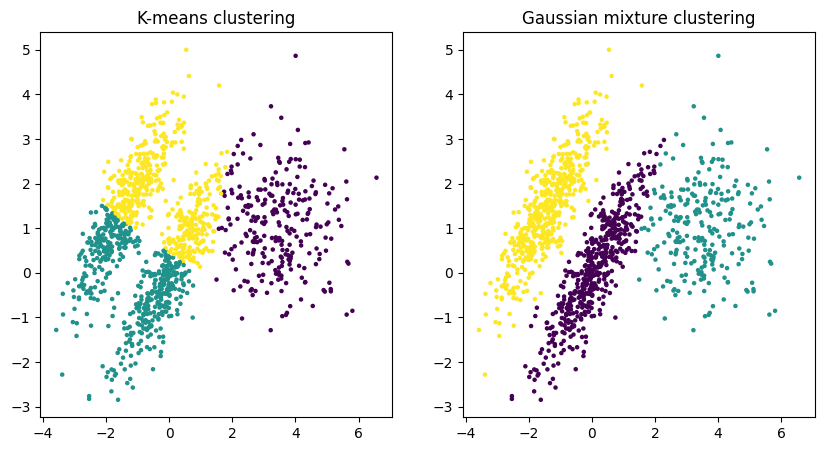

In [98]:
# Plot the clustering results
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=5)
axs[0].set_title('K-means clustering')

axs[1].scatter(X[:, 0], X[:, 1], c=gmm_labels, s=5)
axs[1].set_title('Gaussian mixture clustering')

plt.show()

You can check whether or not the algorithm converged and how many iterations it
took:

In [99]:
print("Converged?             ", gmm.converged_)
print("Iteration to converge: ", gmm.n_iter_)

Converged?              True
Iteration to converge:  7


GMM is a *generative model*, meaning you can actually sample new instances from it (note
that they are ordered by cluster index):

In [100]:
X_new, y_new = gmm.sample(6)
print("\nNew generated points")
print(X_new)
print("\nCluster assignment")
print(y_new)


New generated points
[[-1.32399478 -0.54685709]
 [-1.14852088 -2.14076068]
 [ 2.3587501   1.0709083 ]
 [ 3.56550462  1.4373568 ]
 [-1.93079571  1.56677432]
 [-2.00838917  0.64585939]]

Cluster assignment
[0 0 1 1 2 2]


It is also possible to estimate the density of the model at any given location. This is
achieved using the `score_samples()` method: for each instance it is given, this
method estimates the log of the probability density function (PDF) at that location.
The greater the score, the higher the density:

In [101]:
gmm.score_samples(X)

array([-2.60787854, -3.57199165, -3.32993237, ..., -3.51316177,
       -4.39950108, -3.81029425])

If you compute the exponential of these scores, you get the value of the PDF at the
location of the given instances. These are not probabilities, but probability densities:
they can take on any positive value, not just between 0 and 1. To estimate the probability
that an instance will fall within a particular region, you would have to integrate
the PDF over that region (if you do so over the entire space of possible instance locations,
the result will be 1).

In [102]:
'''
This function is designed for visualizing centroids in clustering analyses. It offers the flexibility 
to emphasize certain centroids over others based on weights and allows for customization of the visual 
representation through colors and marker styles. The use of both circles and crosses ensures that 
centroids are prominently marked on the plot, with the crosses serving to pinpoint the exact centroid locations.

source: Géron cit.
'''
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [103]:
from matplotlib.colors import LogNorm
'''
This code defines a function plot_gaussian_mixture intended to visualize the decision boundaries 
and density contours of a Gaussian Mixture Model (GMM) fitted to data. It also plots the data 
points and the centroids of the mixture components. 

source: Géron cit.
'''
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    # Calculate the minimum and maximum values of X for both dimensions, adding a small buffer (.1)
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    
    # Create a meshgrid for plotting, based on the min and max values of X
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    # Compute the log of the probability densities for each point on the grid
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the filled contours using a logarithmic scale for the color normalization
    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),  # Logarithmic normalization
                 levels=np.logspace(0, 2, 12))  # Levels of contours on a log scale
    
    # Plot contour lines to define the boundaries more clearly, in black
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    # Predict cluster membership for each point on the grid and plot decision boundaries in red dashed lines
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    # Plot the original data points in black with small markers
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    
    # Plot the centroids of the Gaussian mixtures, adjusting for their weights
    plot_centroids(clusterer.means_, clusterer.weights_)

    # Set the x-label with a custom font size
    plt.xlabel("$x_1$", fontsize=14)
    
    # Conditionally set the y-label based on the function argument `show_ylabels`
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


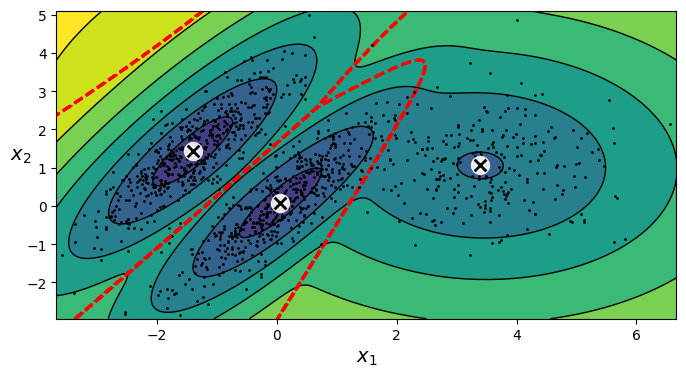

In [104]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gmm, X)
plt.show()

### Selecting the Number of Clusters

Determining the number of clusters in a Gaussian Mixture Model (GMM) for clustering involves finding the model that best balances fit and complexity. GMMs assume that the data is generated from a mixture of several Gaussian distributions, with each distribution representing a cluster. The challenge is to select the right number of Gaussian components (clusters) that best represent the underlying data without overfitting. Several methods are commonly used to make this decision:

**Akaike Information Criterion (AIC)**

The AIC is a metric that quantifies the goodness of fit of a model and the complexity of the model. It penalizes the likelihood of the model by the number of parameters used. The goal is to minimize the AIC value. When comparing multiple GMMs with different numbers of clusters, the model with the lowest AIC value is generally preferred.

**Bayesian Information Criterion (BIC)**

Similar to AIC, the BIC also includes a penalty term for the number of parameters in the model. However, BIC tends to impose a heavier penalty than AIC, leading to the selection of simpler models with fewer clusters. As with AIC, the model with the lowest BIC value is preferred.

> **NOTE** - Both the BIC and the AIC penalize models that have more parameters to learn (e.g.,
more clusters), and reward models that fit the data well. They often end up selecting
the same model, but when they differ, the model selected by the BIC tends to be simpler
(fewer parameters) than the one selected by the AIC, but it does not fit the data
quite as well (this is especially true for larger datasets).

In [107]:
print("BIC Index : ", gmm.bic(X))
print("AIC Index : ", gmm.aic(X))

BIC Index :  8189.865855583146
AIC Index :  8102.640575468108


**Cross-Validation**

Cross-validation, particularly a method known as "log-likelihood cross-validation," can be used. The idea is to divide the data into training and validation sets, fit the model on the training set, and then evaluate its performance on the validation set based on the log-likelihood. The model that performs best on the validation set (often with the highest log-likelihood) indicates an appropriate number of clusters. However, cross-validation can be computationally expensive for GMMs.

**Silhouette Score**

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette scores range from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. By calculating the average silhouette score for different numbers of clusters, you can select the number that maximizes the score.

**Elbow Method**

Although more heuristic and visual, the elbow method involves plotting a relevant metric (like the total within-cluster variance, AIC, or BIC) against the number of clusters and looking for an "elbow" point. This point represents where the rate of decrease sharply changes, suggesting diminishing returns by increasing the number of clusters.

In [108]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [109]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

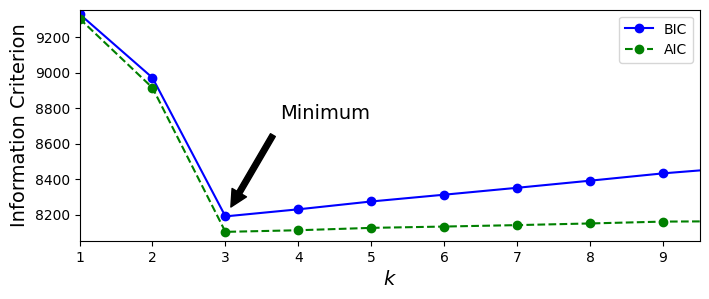

In [111]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

**Choosing the Right Method**

The choice of method depends on the specific dataset and the goals of the clustering. AIC and BIC are widely used due to their balance of model complexity and fit, and they offer a straightforward criterion for model selection. Cross-validation and silhouette scores can provide additional insights but might require more computational resources or might not be as straightforward to interpret.

In practice, it's often recommended to use a combination of these methods rather than relying on a single criterion, and to consider the domain knowledge and the specific context of the data when deciding on the number of clusters.

## Cluster Validation Techniques

### Introduction

Cluster validation techniques are crucial for assessing the quality of clustering results. These techniques help in determining the effectiveness of the clustering process, including how well the data points have been grouped into clusters. Cluster validation can be broadly categorized into three types: internal, external, and relative validation methods. Each type offers a different approach to validate the clustering results, and they can be used based on the availability of ground truth data and the specific goals of the clustering analysis.

### Internal Validation Methods

Internal validation methods evaluate the clustering quality using the dataset itself without any reference to external data. These methods often focus on the compactness and separation of the clusters:

- **Silhouette Coefficient**: We have already discussed this method in the previous chapters. As we known, it measures how similar an object is to its own cluster compared to other clusters. The value ranges from -1 (incorrect clustering) to +1 (highly dense clustering), with 0 indicating overlapping clusters.
- **Davies-Bouldin Index**: Evaluates the clustering quality by measuring the ratio between within-cluster distances and between-cluster distances. Lower values indicate better clustering.
- **Calinski-Harabasz Index**: Also known as the Variance Ratio Criterion, it measures the ratio of the sum of between-clusters dispersion to within-cluster dispersion. Higher values typically indicate better-defined clusters.


To illustrate the use of these indexes for evaluating clustering quality, we'll use a synthetic dataset. This example involves the following steps:

1. Generate a synthetic dataset using `make_blobs`.
2. Apply K-means clustering to this dataset.
3. Calculate the Davies-Bouldin Index to evaluate the clustering.

First, ensure you have the necessary libraries installed:
- `numpy`
- `matplotlib`
- `sklearn`

If you don't have these libraries installed, you can install them using pip:
```sh
pip install numpy matplotlib scikit-learn
```

This program generates a synthetic dataset, applies K-means clustering, evaluates the clustering quality using the Davies-Bouldin Index, and visualizes the results. A lower Davies-Bouldin Index suggests that the clusters are more distinct from each other, indicating better clustering quality.

Davies-Bouldin Index: 0.21231599538998425
Calinski-Harabasz Index: 5196.295097418395


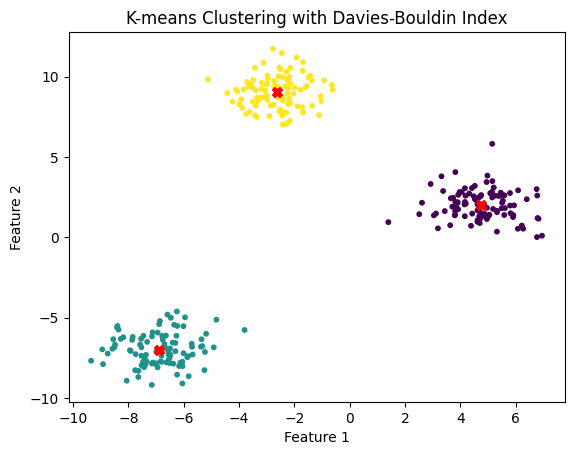

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Step 1: Generate a synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 3
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, cluster_std=1, random_state=42)

# Step 2: Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_

# Step 3: Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {db_index}")
# Step 4: Calculate the Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz Index: {ch_index}")

# Plotting the clusters and their centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, marker='o', s=10, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='X')
plt.title('K-means Clustering with Davies-Bouldin Index')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Explanation**

- **Generate a synthetic dataset**: `make_blobs` is used to generate a dataset with a specified number of samples, features, and clusters. The `cluster_std` parameter controls the spread of the clusters.
- **Apply K-means clustering**: The `KMeans` algorithm from scikit-learn is applied to the dataset. The number of clusters is set to match the actual number of clusters in the synthetic dataset.
- **Calculate the Davies-Bouldin Index**: `davies_bouldin_score` calculates the Davies-Bouldin Index for the clustering, which is a measure of the average similarity between clusters. Lower values indicate better clustering separation.
- **Plotting**: The scatter plot shows the data points colored by their cluster assignments, with cluster centroids marked in red.

### External Validation Methods

External validation methods require ground truth labels to assess the clustering performance. These methods compare the clustering results against a predefined set of labels:

- **Adjusted Rand Index (ARI)**: Measures the similarity between two clusterings, taking into account the chance grouping of elements. It has a maximum value of 1 (perfect match) and can have negative values for independent clusterings.
- **Normalized Mutual Information (NMI)**: Measures the mutual information between the ground truth and the clustering results, normalized to account for the size of the clusters. A value of 1 indicates perfect agreement, while 0 indicates no mutual information.
- **Homogeneity, Completeness, and V-Measure**: These metrics assess the quality of clustering from different perspectives. Homogeneity checks if each cluster contains only members of a single class. Completeness assesses whether all members of a given class are assigned to the same cluster. V-Measure is the harmonic mean of homogeneity and completeness.

To illustrate the use of these indexes for assessing the quality of a clustering technique, we'll follow a structured approach similar to the previous examples. This time, we'll generate a synthetic dataset with known labels, apply K-means clustering, and then calculate the ARI comparing the known labels with the labels obtained from clustering. The ARI is particularly useful for situations where the true cluster assignments of the data points are known, allowing for an external evaluation of the clustering quality.

Here's a simple Python program for this purpose:

Adjusted Rand Index (ARI): 0.6556
Normalized Mutual Information (NMI): 0.6100
Homogeneity: 0.6086
Completeness: 0.6113
V-measure: 0.6100


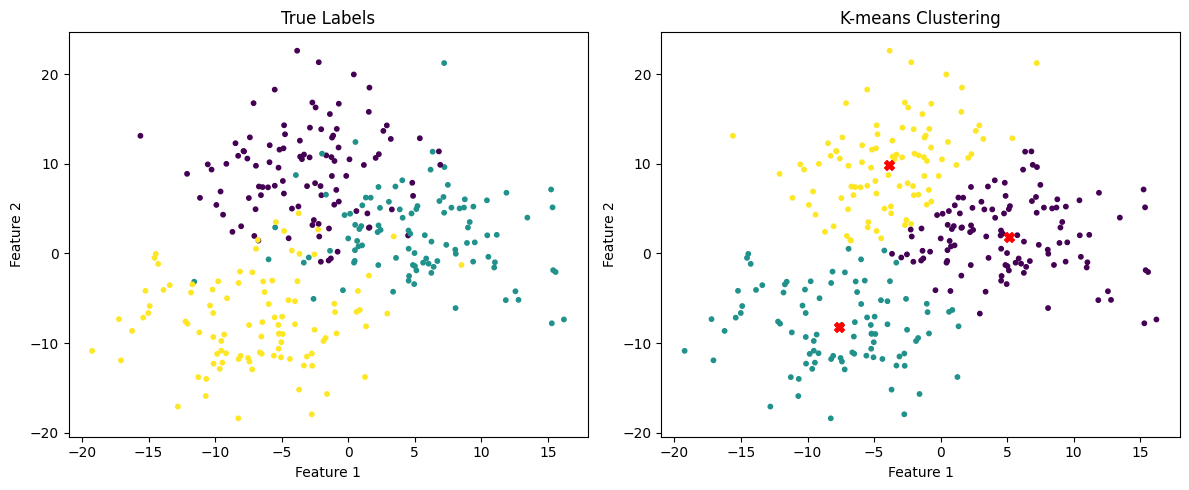

In [11]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score 

# Step 1: Generate a synthetic dataset with true labels
n_samples = 300
n_features = 2
n_clusters = 3
X, y_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, cluster_std=5, random_state=42)

# Step 2: Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(X)
y_pred = kmeans.labels_

# Step 3: Calculate the Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

# Step 4: Calculate the Normalized Mutual Information (NMI)
nmi_score = normalized_mutual_info_score(y_true, y_pred)
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")

# Step 5: Calculate homogeneity, completeness, and V-measure
homogeneity = homogeneity_score(y_true, y_pred)
completeness = completeness_score(y_true, y_pred)
v_measure = v_measure_score(y_true, y_pred)
print(f"Homogeneity: {homogeneity:.4f}")
print(f"Completeness: {completeness:.4f}")
print(f"V-measure: {v_measure:.4f}")

# Plotting the true labels vs. clustering results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# True labels
ax[0].scatter(X[:, 0], X[:, 1], c=y_true, s=10, cmap='viridis', marker='o')
ax[0].set_title('True Labels')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# K-means clustering results
ax[1].scatter(X[:, 0], X[:, 1], c=y_pred, s=10, cmap='viridis', marker='o')
centroids = kmeans.cluster_centers_
ax[1].scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='X')
ax[1].set_title('K-means Clustering')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


### Relative Validation Methods

Relative validation methods involve comparing different clustering models or configurations to determine which one performs best for a particular dataset:

- **Gap Statistic**: Compares the total within intra-cluster variation for different values of k (number of clusters) with their expected values under null reference distribution of the data. The optimal number of clusters is the value of k that maximizes the gap statistic.
- **Elbow Method**: Involves plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

Choosing the appropriate cluster validation technique depends on the specific objectives of the clustering analysis, whether external labels are available, and the characteristics of the dataset being analyzed. Combining multiple validation measures can provide a more comprehensive assessment of the clustering quality.

Implementing the Gap Statistic to evaluate clustering quality involves a more complex procedure than the previous metrics. The Gap Statistic compares the total within intra-cluster variation for different numbers of clusters with their expected values under a null reference distribution of the data (i.e., data with no apparent clustering). The optimal number of clusters is then chosen as the one for which the Gap Statistic reaches its maximum.

Because there's no direct implementation of the Gap Statistic in popular Python libraries like `scikit-learn`, we should compute it manually or use a library that offers an implementation. However, for a more educational and simplified illustration, let's focus on the conceptual approach.

**Conceptual Approach for Gap Statistic**

- *Clustering the Original Data*: Perform clustering (e.g., K-means) on your dataset for a range of cluster counts (k). For each k, compute the within-cluster sum of squares (WCSS).

- *Generating Reference Datasets*: Create B reference datasets by generating uniform random samples of your dataset. The number of points in each reference dataset should match your original dataset.

- *Clustering Reference Datasets*: For each reference dataset and each k, perform clustering and calculate the WCSS.

- *Calculating the Gap Statistic*: For each k, calculate the Gap Statistic as the difference between the log(WCSS) of the reference datasets and the log(WCSS) of the original dataset.

- *Choosing the Optimal k*: The optimal number of clusters is the smallest k such that Gap(k) >= Gap(k+1) - s(k+1), where s(k) is the standard deviation of the Gap values over the B reference datasets for cluster count k.

## References and Credits

[1] - Géron A. - "Hands On Machine Learning with Scikit-Learn Keras and Tensorflow", O Reilly 

[2] - Yenigün O. - "Clustering With Gaussian Mixture Models", Published in [Towards Dev](https://towardsdev.com/clustering-with-gaussian-mixture-models-c2c3ecdc6640) May 15, 2023 

[3] - Yehoshua R. - "Gaussian Mixture Models (GMMs): from Theory to Implementation", Published in [Towards Data Science](https://towardsdatascience.com/gaussian-mixture-models-gmms-from-theory-to-implementation-4406c7fe9847) Nov 28, 2023

[4] - Contreras Carrasco O. - "Gaussian Mixture Models Explained: From intuition to implementation", Published in [Towards Data Science](https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95) Jun 3, 2019

[5] - Atta S. - "Gaussian Mixture Models (GMM) Clustering in Python", Published in [Medium](https://soumenatta.medium.com/gaussian-mixture-models-gmm-clustering-in-python-d8d6ca2693f2) Apr 10, 2023 

[6] - Gandhi V. - "Gaussian Mixture Models Clustering - Explained", Published in [Kaggle](https://www.kaggle.com/code/vipulgandhi/gaussian-mixture-models-clustering-explained)

[7] - Ravihara R. - ["Gaussian Mixture Model Clearly Explained"](https://towardsdatascience.com/gaussian-mixture-model-clearly-explained-115010f7d4cf), Published in Towards Data Science an 10, 2023